In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

execfile ("_ImportScript.py")

1


In [ ]:
execfile ("_ExploreMocksOneNoiseRezEach.py")

In [3]:
alphas = np.loadtxt("RobustnessAnalysis/alpha_lmax8lmin2nmax2nmin1.txt")

1


In [4]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

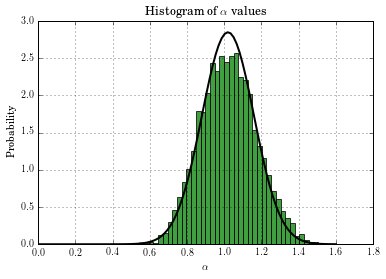

In [62]:
import matplotlib.pyplot as plt
from scipy.stats import norm
n, bins, patches = plt.hist(alphas, 40, normed=1, facecolor='green', alpha=0.75)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlabel(r'$\alpha$')
plt.ylabel('Probability')
plt.title(r'Histogram of $\alpha$ values')

#x = np.linspace(norm.ppf(0.01, loc=1, scale=0.19), norm.ppf(0.99, loc=1,  scale=0.19), 100)
x=np.linspace(0,1.6, 100)
rv = norm()
plt.plot(x, norm.pdf(x, loc=1.02, scale=0.14), 'k-', lw=2, label='frozen pdf')


#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.savefig('RobustnessAnalysis/alphahist_lmax8_nmax2.png')

plt.show()

In [71]:
#Find the best fit mu and sigma for the Gaussian
from scipy.stats import multivariate_normal
# Find the best fit mu and sigma
sigma, mu = np.mgrid[0.14:0.16:.01, 1.0:1.04:.01]
posterior = np.zeros(sigma.shape)
print sigma.shape
for i in range(sigma.shape[0]):
    for j in range(sigma.shape[1]):
        posterior[i, j] = multivariate_normal.pdf(alphas, mu[i, j]*np.ones(alphas.shape), sigma[i, j]*np.diag(np.ones(alphas.shape)))
        print i, j
max_ind = np.argmax(posterior)

(2, 5)
0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4


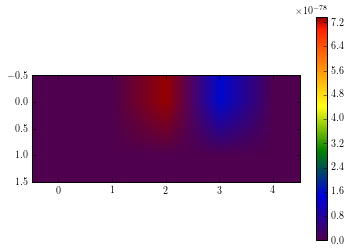

In [72]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(posterior)
plt.colorbar()


In [84]:
print np.argmax(posterior)
print sigma[0,2]
print mu[0,2]


2
0.14
1.02


In [6]:
sum_alpha = 0
for i in range(len(alphas)):
    sum_alpha=sum_alpha+(alphas[i]-1)**2
    
sum_alpha= sum_alpha/len(alphas)

print 'For l_max = ' + str(beatbox.Multiverse.truncated_lmax) + ' and n_max = ' + str(beatbox.Multiverse.truncated_nmax) + ', the alpha recovery success is ' + str(sum_alpha) + '.' 

For l_max = 8 and n_max = 2, the alpha recovery success is 0.0234348783315.


In [9]:
from scipy.stats import chi2
print 1-chi2.cdf(1.14, 5) 

0.950502397598


In [7]:
print len(beatbox.You.all_reconstructed_universes)
print len(beatbox.You.all_simulated_universes)

10000
10000


In [12]:
beatbox.You.solve_for_3D_potential(MockUniverse[-1].ay2ayreal_for_inference(MockUniverse[-1].ay))
Delta_fn = beatbox.You.all_simulated_universes[-1].fn.reshape(64, 1)-beatbox.You.all_reconstructed_universes[-1].fn
chi2value = np.dot (Delta_fn.T , np.dot( beatbox.You.inv_A, Delta_fn  ))
p_value = 1-chi2.cdf(chi2value, len(beatbox.You.all_simulated_universes[0].fn)) 
print chi2.cdf(chi2value, len(beatbox.You.all_simulated_universes[0].fn))
print p_value, chi2value

[[ 0.90871654]]
[[ 0.09128346]] [[ 79.52888077]]


In [74]:
pvals=np.array([])
chi2vals=np.array([])
for a in range(10000):
    beatbox.You.solve_for_3D_potential(MockUniverse[a].ay2ayreal_for_inference(MockUniverse[a].ay))
    Delta_fn = beatbox.You.all_simulated_universes[a].fn.reshape(64, 1)-beatbox.You.all_reconstructed_universes[a].fn
    chi2value = np.dot (Delta_fn.T , np.dot( beatbox.You.inv_A, Delta_fn  ))
    p_value = 1-chi2.cdf(chi2value, len(beatbox.You.all_simulated_universes[a].fn)) 
    pvals = np.append(pvals, p_value)
    chi2vals = np.append(chi2vals, chi2value)

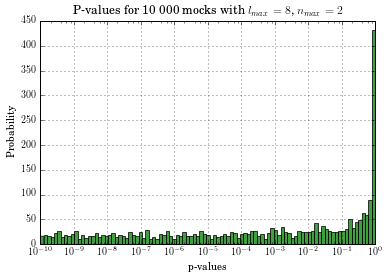

In [85]:
n, bins, patches = plt.hist(pvals,bins=np.logspace(-10., 0.0, 100), facecolor='green', alpha=0.75)
plt.gca().set_xscale("log")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlabel(r'p-values')
plt.ylabel('Probability')
plt.title(r'P-values for 10 000 mocks with $l_{max}=8$, $n_{max}=2$')

#x = np.linspace(norm.ppf(0.01, loc=1, scale=0.19), norm.ppf(0.99, loc=1,  scale=0.19), 100)
#x=np.linspace(0,1.6, 100)
#rv = norm()
#plt.plot(x, norm.pdf(x, loc=1.02, scale=0.14), 'k-', lw=2, label='frozen pdf')


#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.savefig('RobustnessAnalysis/pvalshist_lmax8_nmax2.png')

plt.show()

In [91]:
beatbox.You.calculate_chi2_in_posterior(beatbox.You.all_simulated_universes[0], beatbox.You.all_reconstructed_universes[0])

AttributeError: 'Multiverse' object has no attribute 'calculate_chi2_in_posterior'

In [84]:
np.savetxt('RobustnessAnalysis/pvalues_lmax8_nmax2.txt',pvals )

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


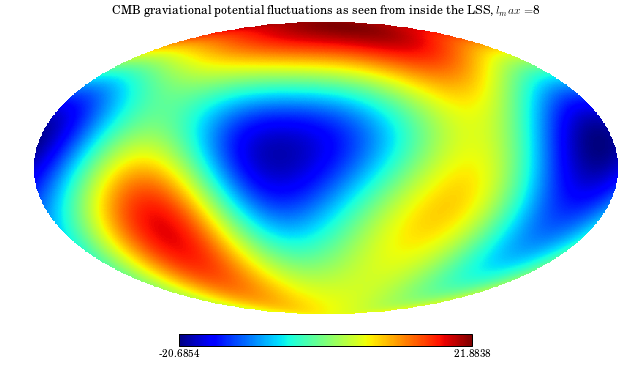

In [89]:
beatbox.You.all_simulated_universes[1].show_CMB_T_map()

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


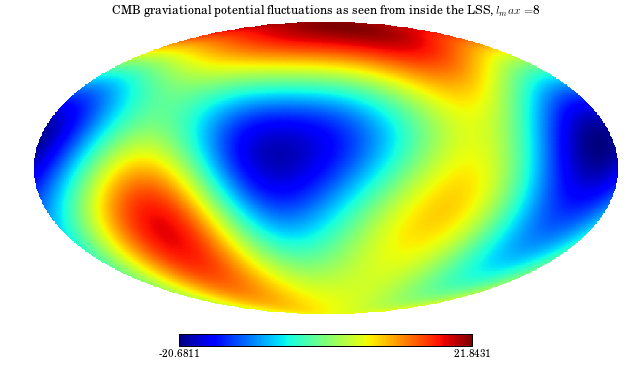

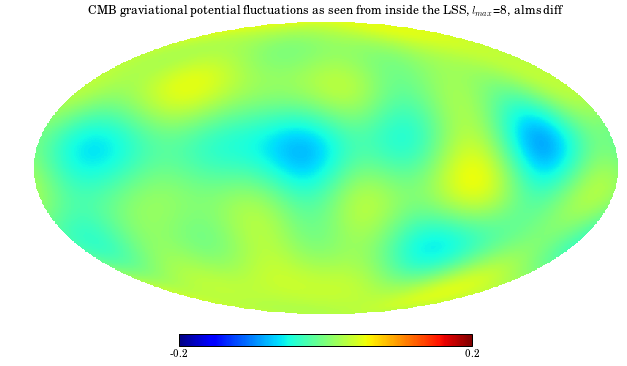

In [90]:
beatbox.You.all_reconstructed_universes[1].transform_3D_potential_into_alm(usedefault=1, fn=1)
beatbox.You.all_reconstructed_universes[1].show_CMB_T_map()
WeRes = beatbox.Universe()
WeRes.alm = (beatbox.You.all_simulated_universes[1].alm-beatbox.You.all_reconstructed_universes[1].alm)

    #WeRes.ay2alm(WeRes.ay)
WeRes.NSIDE = 256
WeRes.Tmap = hp.alm2map(WeRes.alm,WeRes.NSIDE)

hp.mollview(WeRes.Tmap,  rot=(-90,0,0), min =-0.2, max=0.2, title="CMB graviational potential fluctuations as seen from inside the LSS, $l_{max}$=%d, alms diff" % We.truncated_lmax)
    #WeRes.show_CMB_T_map( from_perspective_of="observer")

In [22]:
from beatbox import Universe

In [23]:
beatbox.You.create_original_Universe()

In [41]:
We = beatbox.Universe()
beatbox.Universe.set_Universe_k_filter(We)


In [50]:
beatbox.Universe.populate_Universe_R(We)

In [46]:
Universe.high_k_cutoff = Universe.truncated_nmax*Universe.Deltak
Universe.low_k_cutoff = Universe.truncated_nmin*Universe.Deltak
    
    # Define the filter
low_k_filter = (~(Universe.n < Universe.truncated_nmin)).astype(int)
high_k_filter = (~(Universe.n > Universe.truncated_nmax)).astype(int)
Universe.kfilter = high_k_filter*low_k_filter

In [53]:
from scipy.special import sph_harm,sph_jn
truncated_nmax = Universe.truncated_nmax
truncated_nmin = Universe.truncated_nmin
truncated_lmax = Universe.truncated_lmax
truncated_lmin = Universe.truncated_lmin
lms = Universe.lms
kfilter = Universe.kfilter
    
    # Initialize R matrix:
NY = (truncated_lmax + 1)**2 - (truncated_lmin)**2
    # Find the indices of the non-zero elements of the filter
ind = np.where(Universe.kfilter>0)
# The n index spans 2x that length, 1st half for the cos coefficients, 2nd half
    #    for the sin coefficients
NN = 2*len(ind[1])
Universe.R = np.zeros([NY,NN], dtype=np.complex128)

k, theta, phi = Universe.k[ind], np.arctan2(Universe.ky[ind],Universe.kx[ind]), np.arccos(Universe.kz[ind]/Universe.k[ind])
    # We need to fix the 'nan' theta element that came from having ky=0
theta[np.isnan(theta)] = np.pi/2.0
    
    # Get ready to loop over y
y = 0
A = [sph_jn(truncated_lmax,ki)[0] for ki in k]        
    # Loop over y, computing elements of R_yn 
for i in lms:        
    l = i[0]
    m = i[1]
        
    trigpart = np.cos(np.pi*l/2.0)
    B = np.asarray([A[ki][l] for ki in range(len(k))])
    Universe.R[y,:NN/2] = 4.0 * np.pi * sph_harm(m,l,theta,phi).reshape(NN/2)*B.reshape(NN/2) * trigpart
    trigpart = np.sin(np.pi*l/2.0)
    Universe.R[y,NN/2:] = 4.0 * np.pi * sph_harm(m,l,theta,phi).reshape(NN/2)*B.reshape(NN/2)* trigpart
                
    y = y+1  